Link to dataset that was used: https://www.kaggle.com/datasets/suyashlakhani/apple-stock-prices-20152020/data

# **Mounting Google Colab to Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Import necessary Libraries and Packages**

In [ ]:
# Import pandas library for reading the dataset
import pandas as pd

# Import numpy library for matrix manipulation
import numpy as np

# Import matplotlib for data visualization
import matplotlib.pyplot as plt

# Import matplotlib.ticker for formatting
import matplotlib.ticker as ticker

# Import scikit learn train test split libary to split the dataset into random train and test subsets
from sklearn.model_selection import train_test_split

# Import libaries for linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import math

# **Linear Regression**



In [ ]:
dataframe = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/MCO3/AppleStockPrices.csv')
dataframe.info()
dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1258 non-null   int64  
 1   symbol       1258 non-null   object 
 2   date         1258 non-null   object 
 3   close        1258 non-null   float64
 4   high         1258 non-null   float64
 5   low          1258 non-null   float64
 6   open         1258 non-null   float64
 7   volume       1258 non-null   int64  
 8   adjClose     1258 non-null   float64
 9   adjHigh      1258 non-null   float64
 10  adjLow       1258 non-null   float64
 11  adjOpen      1258 non-null   float64
 12  adjVolume    1258 non-null   int64  
 13  divCash      1258 non-null   float64
 14  splitFactor  1258 non-null   float64
dtypes: float64(10), int64(3), object(2)
memory usage: 147.5+ KB


,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.0500,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.1000,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.9000,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.0500,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.3200,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,1253,AAPL,2020-05-18 00:00:00+00:00,314.960,316.500,310.3241,313.17,33843125,314.960000,316.500000,310.324100,313.170000,33843125,0.0,1.0
1254,1254,AAPL,2020-05-19 00:00:00+00:00,313.140,318.520,313.0100,315.03,25432385,313.140000,318.520000,313.010000,315.030000,25432385,0.0,1.0
1255,1255,AAPL,2020-05-20 00:00:00+00:00,319.230,319.520,316.2000,316.68,27876215,319.230000,319.520000,316.200000,316.680000,27876215,0.0,1.0
1256,1256,AAPL,2020-05-21 00:00:00+00:00,316.850,320.890,315.8700,318.66,25672211,316.850000,320.890000,315.870000,318.660000,25672211,0.0,1.0


In [ ]:
dataframe.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


# **Data Cleaning**


The data cleaning step consisted of removing unnecessary data or features that were not going to be used in creating and testing the model. In our case we only needed two features, the "open" and "close".

open - Opening price of the stock in USD ($)

close - Closing Price of the stock in USD ($)

In [ ]:
# Saving the cleaned dataframe into a temp variable

temp = dataframe[['open', 'close']]

# Overwriting the dataframe with the cleaned dataframe

dataframe = temp

# Saving the cleaned dataframe to a file for submission

temp.to_csv('/content/drive/MyDrive/Colab Notebooks/AppleStockPrices(Cleaned).csv', index = False)

Here, we visualized the data to check for a linear relationship between the input data (open) and output data (close). After plotting the dataset on a scatter plot, we observed a positive linear relationship between them.

Text(0, 0.5, 'Close Price in USD ($)')

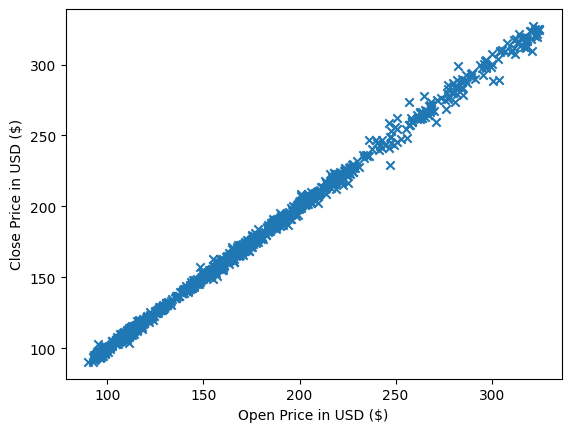

In [ ]:
# Visualize the data

plt.scatter(dataframe['open'], dataframe['close'], marker = 'x')
plt.xlabel('Open Price in USD ($)')
plt.ylabel('Close Price in USD ($)')

# **Model Creation**

Preparation for creating our Model consisted of:

  1. Computing for the number of Training and Testing Samples
    - In our case, we employed a 70-30 split for our training and testing data, respectively.
  2. Splitting the Dataset for Training and Testing
    - The different subsets were stored into their own respective variables to prepare them for plugging into the model.
  3. Converting them into the correct format
    -  The data needed to be converted into the numpy format and reshape it into a 1D array, enabling the model to interpret and process the input.

After these steps, the data is ready to be fed into the model and create predictions after learning from the testing data subset.

In [ ]:
# Computing for number of Training Samples

n = len(dataframe)
data_train = math.ceil(n * 0.7)
print("Number of Training Samples:", data_train)

Number of Samples: 881


In [ ]:
# For confirming the number of train and test data later on

train_data = dataframe.loc[:data_train - 1].to_numpy()
test_data = dataframe.loc[data_train:]

In [ ]:
# X = input variable, Y = output variable

X = dataframe[['open']]
Y = dataframe[['close']]

# Splits the data into subsets for training and testing sets

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 2)
print("Number of Samples:", len(dataframe))
print("Number of Training:", len(X_train))
print("Number of Testing:", len(X_test))

Number of Samples: 1258
Number of Training: 880
Number of Testing: 378


In [ ]:
# Reshape data into scikit learn format

X_train = X_train.to_numpy()
Y_train = Y_train.to_numpy()
X_test = X_test.to_numpy()
Y_test = Y_test.to_numpy()

X_train = X_train.reshape(-1, 1)
Y_train = Y_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
Y_test = Y_test.reshape(-1, 1)

# Training the Model

---

The X_train and Y_train data sets are plugged into the Linear Regression Model by using the fit function from scikit learn in order to compute for the best fit line to be used for predicting the output for the testing dataset.

In [ ]:
# Using the Linear Regression Model, we train it using the train data subset in order to find the best fit line

LRModel = LinearRegression()

LRModel.fit(X_train, Y_train)

LinearRegression()

In [ ]:
# Using the trained model, we can create predictions by using the X_test data subset

Y_predictions = LRModel.predict(X_test)
Y_predictions

In [ ]:
# Evaluate the Linear Regression model

r2_result = r2_score(Y_test, Y_predictions)
print("R2 for Linear Regression:", r2_result)

R2 for Linear Regression: 0.9977876704303842


In [ ]:
# Storing the results into a dataframe

LRModel_results = np.concatenate((X_test, Y_test, Y_predictions), axis = 1)
LRModel_results_df = pd.DataFrame(LRModel_results, columns = ['Open Price', 'Close Price', 'Predicted Close Price'])
LRModel_results_df

,Open Price,Close Price,Predicted Close Price
0,115.920,116.61,115.955497
1,96.670,98.12,96.661984
2,175.480,176.94,175.650128
3,110.430,105.76,110.453087
4,167.805,167.78,167.957779
...,...,...,...
373,109.070,109.58,109.090013
374,147.170,145.82,147.276135
375,138.850,139.20,138.937328
376,180.320,178.44,180.501068


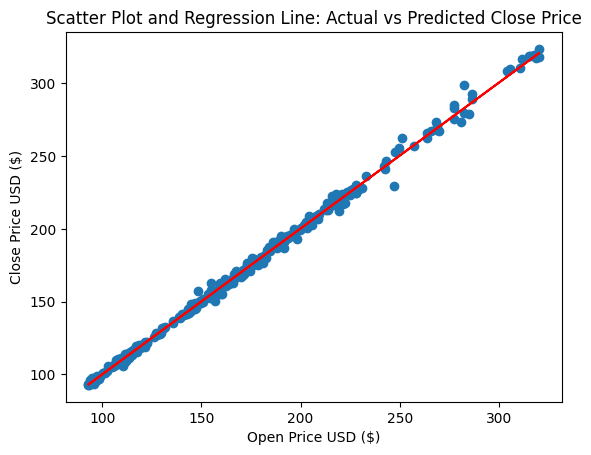

In [ ]:
# Create a scatter plot visualize the relationship betweeen Open and Close Price

plt.scatter(LRModel_results_df['Open Price'], LRModel_results_df['Close Price'])

# Include regression line to show Predicted Close Price based on Actual Close Price

plt.plot(LRModel_results_df['Open Price'], LRModel_results_df['Predicted Close Price'], color ='red')

plt.xlabel('Open Price USD ($)')
plt.ylabel('Close Price USD ($)')
plt.title('Scatter Plot and Regression Line: Actual vs Predicted Close Price')

plt.show()

In [ ]:
# Show the Line Equation

m = float(LRModel.coef_)
b = float(LRModel.intercept_)
print(f"Line Equation:  y = {m} x + {b}")

Line Equation:  y = 1.0022604269545008 x + -0.22653183822257006


# Ridge Regression


In [ ]:
dataframe = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/MCO3/AppleStockPrices.csv')
dataframe.info()
dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1258 non-null   int64  
 1   symbol       1258 non-null   object 
 2   date         1258 non-null   object 
 3   close        1258 non-null   float64
 4   high         1258 non-null   float64
 5   low          1258 non-null   float64
 6   open         1258 non-null   float64
 7   volume       1258 non-null   int64  
 8   adjClose     1258 non-null   float64
 9   adjHigh      1258 non-null   float64
 10  adjLow       1258 non-null   float64
 11  adjOpen      1258 non-null   float64
 12  adjVolume    1258 non-null   int64  
 13  divCash      1258 non-null   float64
 14  splitFactor  1258 non-null   float64
dtypes: float64(10), int64(3), object(2)
memory usage: 147.5+ KB


,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.0500,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.1000,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.9000,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.0500,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.3200,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,1253,AAPL,2020-05-18 00:00:00+00:00,314.960,316.500,310.3241,313.17,33843125,314.960000,316.500000,310.324100,313.170000,33843125,0.0,1.0
1254,1254,AAPL,2020-05-19 00:00:00+00:00,313.140,318.520,313.0100,315.03,25432385,313.140000,318.520000,313.010000,315.030000,25432385,0.0,1.0
1255,1255,AAPL,2020-05-20 00:00:00+00:00,319.230,319.520,316.2000,316.68,27876215,319.230000,319.520000,316.200000,316.680000,27876215,0.0,1.0
1256,1256,AAPL,2020-05-21 00:00:00+00:00,316.850,320.890,315.8700,318.66,25672211,316.850000,320.890000,315.870000,318.660000,25672211,0.0,1.0


## **Data Cleaning**

Same as the linear regression model above, the data will only use "Open" and "Close" Prices

In [ ]:
# Data Cleaning
columns_to_drop = ['symbol', 'date', 'high', 'low', 'volume', 'adjLow', 'adjClose', 'adjHigh', 'adjOpen', 'adjVolume', 'divCash', 'splitFactor']

dataframe.drop(columns = columns_to_drop, inplace = True)

dataframe

,Unnamed: 0,close,open
0,0,132.045,130.34
1,1,131.780,131.86
2,2,130.280,131.23
3,3,130.535,131.20
4,4,129.960,129.86
...,...,...,...
1253,1253,314.960,313.17
1254,1254,313.140,315.03
1255,1255,319.230,316.68
1256,1256,316.850,318.66


## **Splitting the data sets to random train and test subsets**

In [ ]:
# Import scikit learn train test split libary to split the dataset into random train and test subsets

from sklearn.model_selection import train_test_split

X = dataframe[['open']]
Y = dataframe[['close']]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 2)
print("Number of Samples:", len(dataframe))
print("Number of Training:", len(X_train))
print("Number of Testing:", len(X_test))

Number of Samples: 1258
Number of Training: 880
Number of Testing: 378


## **Ridge Model Creation**

In [ ]:
# Import Ridge from scikit-learn

from sklearn.linear_model import Ridge

In [ ]:
# Reshape data into scikit-learn format
X_train = X_train.to_numpy().reshape(-1, 1)
Y_train = Y_train.to_numpy().reshape(-1, 1)
X_test = X_test.to_numpy().reshape(-1, 1)
Y_test = Y_test.to_numpy().reshape(-1, 1)

In [ ]:
# Import RidgeCV for Ridge with built-in cross validation to find the optimal a value for Ridge

from sklearn.linear_model import RidgeCV

# Import cross_val_score for performance evaluation

from sklearn.model_selection import cross_val_score

# Create a range of alpha values

alphas = [0.1, 1.0, 5.0, 10.0, 15.0, 20.0, 25.0, 30.0, 35.0,  50.0, 100.0]

# Create a RidgeCV model with cross-validation

ridge_cv = RidgeCV(alphas=alphas, store_cv_values=True)

# Fit the model to the data

ridge_cv.fit(X_train, Y_train)

# Get the optimal alpha value

optimal_alpha = ridge_cv.alpha_

# Create a Ridge Regression model with the optimal alpha

ridge_model = Ridge(alpha = optimal_alpha)

optimal_alpha

30.0

## **Training the Model**

In [ ]:
# Train the Ridge Regression model

ridge_model.fit(X_train, Y_train)

Ridge(alpha=30.0)

In [ ]:
# Make predictions on the test set

Y_ridge_predictions = ridge_model.predict(X_test)

In [ ]:
# Evaluate the Ridge Regression model

r2_ridge_result = r2_score(Y_test, Y_ridge_predictions)
print("R2 for Ridge Regression:", r2_ridge_result)

R2 for Ridge Regression: 0.9977875953364784


In [ ]:
# Concatenate results for visualization

ridge_results = np.concatenate((X_test, Y_test, Y_ridge_predictions), axis=1)
ridge_results_df = pd.DataFrame(ridge_results, columns=['Open Price', 'Close Price', 'Predicted Close Price (Ridge)'])
ridge_results_df


,Open Price,Close Price,Predicted Close Price (Ridge)
0,115.920,116.61,115.956036
1,96.670,98.12,96.662720
2,175.480,176.94,175.650057
3,110.430,105.76,110.453682
4,167.805,167.78,167.957787
...,...,...,...
373,109.070,109.58,109.090622
374,147.170,145.82,147.276354
375,138.850,139.20,138.937633
376,180.320,178.44,180.500948


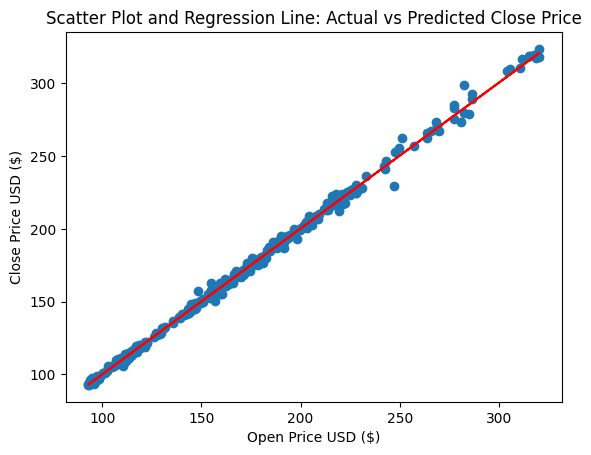

In [ ]:
# Create a scatter plot to visualize the relationship between Open and Close Price

plt.scatter(ridge_results_df['Open Price'], ridge_results_df['Close Price'])

# Include the regression line to show Predicted Close Price based on Actual Close Price

plt.plot(ridge_results_df['Open Price'], ridge_results_df['Predicted Close Price (Ridge)'], color='red')

plt.xlabel('Open Price USD ($)')
plt.ylabel('Close Price USD ($)')
plt.title('Scatter Plot and Regression Line: Actual vs Predicted Close Price')

# Display the plot

plt.show()


In [ ]:
# Show the Line Equation

m = float(ridge_model.coef_)
b = float(ridge_model.intercept_)
print(f"Line Equation:  y = {m} x + {b}")

Line Equation:  y = 1.0022501898648175 x + -0.22480632606425388


# **Comparative Analysis**

## **How the Model Works:**

### **Linear Regression:**

This model aims to establish a linear relationship and predict the value of the dependent, output variable (in this case, the “close” stock prices) based on the independent, input variable (the “open” stock prices).

This algorithm fits a linear equation of the form, y = mx + b wherein m is the line’s slope and b is the y-intercept. This linear equation is used to train the model with the data being split into subsets for training and testing sets. The linear equation will be continuously adjusted in order to minimize the difference between the predicted and the actual values on the training subset, and therefore finding the best fit for the line.

Consequently, evaluation of the trained model will include assessing its performance on the testing subset through the R² (R-squared) score. R² provides a measure of how well the linear regression model explains the variability in “close stock prices” based on “open stock prices”.


### **Ridge Regression:**

Ridge Regression is a model tuning method that is used to analyze data that suffers multicollinearity. This model follows the usual linear regression formula which is y = mx + b but with the addition of the L2 regularization method which is the penalty term where in it gets the minimum sum of the squared residuals plus the multiple of the alpha (or lambda) value and the squared slope. Its purpose is to make the results of the regression become less affected by the variations of the independent variable making the resulting plot be more horizontally inclined. It also makes the model less prone to overfitting (learning too much from the training dataset) leading to a better generalization of the pattern behind the data and better performance on newer, unseen data.

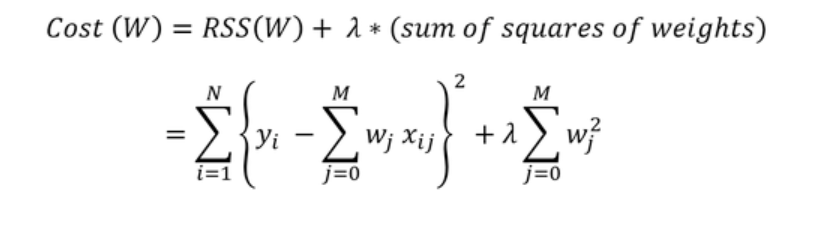

The input of this regression are the independent variables of the given data set. In this case, the independent variable of the plot would be the “Open stock prices”. Here we assume that this piece of data has a linear relationship with the dependent variable “Closed stock prices”

At the end of the processing of the data in the regression model, The R² value will be used to compare with the linear regression model. The R² value represents how close the predicted values generated by the model are to the actual values. The closer the R² value is to 1, the more accurate the model is.

## **Performanace Comparison:**

**Linear vs. Ridge Regression:**

After training both models, based on their respective resulting R²  scores, which show how well the data fit the regression model, it can be observed that both models' results are very close to each other. In evaluating R² scores, the larger the value (the closer to 100% or 1.0), the better. Linear Regression has an R²  score of 0.9977876704303842, while Ridge Regression has an R² score of 0.9977875953364784. This indicates that both models are a good fit. The only difference between the two scores lies in their decimal values, indicating that Linear Regression is a slightly better-fitting model.

Another reason why using Linear Regression is better is because the model only uses one dependent variable (in this case, the “close” stock prices) and one independent variable (the “open” stock prices). Ridge regression is more beneficial when there are multiple independent variables, as its primary purpose is to mitigate multicollinearity issues. A simple Linear Regression might perform equally well or even better as it can already adequately describe the connection between the single dependent and independent variables in the model, making the additional complexity Ridge regression offers unnecessary.